### Hvor mange i prediction settet er vanlige folk, altså ikke utleieselskaper. Bruker listings count som proxy.

In [30]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter

import seaborn as sns
import os
import pandas as pd
import numpy as np
#import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pylab as plt

In [2]:
prediction_set = pd.read_csv('../data/test_set_prepped.csv')


In [3]:
prediction_set.columns

Index(['id', 'host_since', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'property_type',
       'accommodates', 'bedrooms', 'beds', 'price', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'shared_bathroom', 'num_baths', 'imputed_review_score',
       'distance_to_closest_subway', 'room_type_Entire home/apt',
       'room_type_Private room', 'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens'],
      dtype='object')

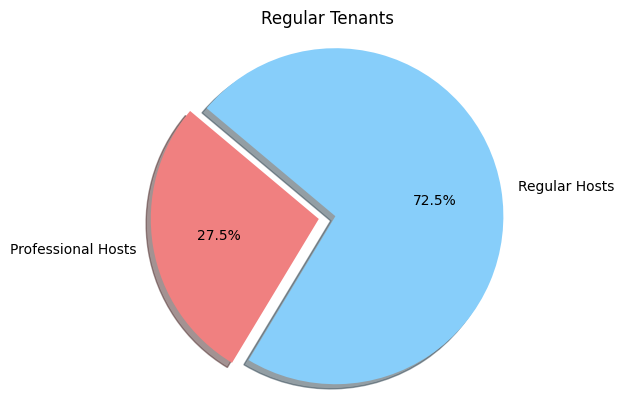

In [22]:
over_10 = prediction_set[prediction_set['calculated_host_listings_count'] > 2].shape[0]
upto_10 = prediction_set[prediction_set['calculated_host_listings_count'] <= 2].shape[0]

# Data to plot
labels = 'Professional Hosts', 'Regular Hosts'
sizes = [over_10, upto_10]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Regular Tenants')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


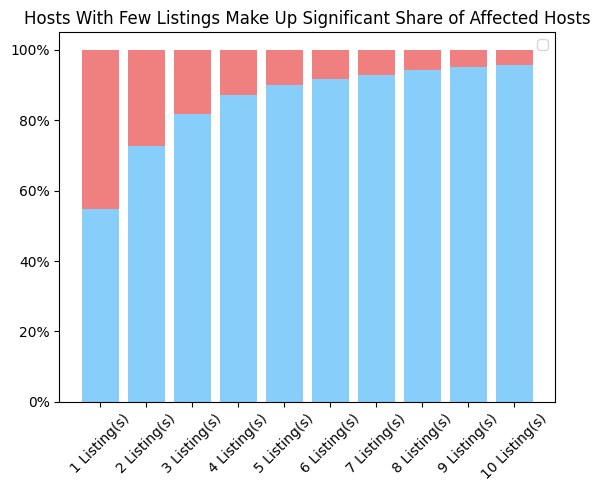

In [33]:
# Initialize lists to store the data
categories = []
over_values = []
upto_values = []

def to_percentage(x, pos):
    return f'{int(x)}%'

# Loop through values from 1 to 10
for value in range(1, 11):
    categories.append(f'{value} Listing(s)')
    over_count = prediction_set[prediction_set['calculated_host_listings_count'] > value].shape[0]
    upto_count = prediction_set[prediction_set['calculated_host_listings_count'] <= value].shape[0]
    total_count = over_count + upto_count

    # Calculate percentages
    over_percentage = (over_count / total_count) * 100
    upto_percentage = (upto_count / total_count) * 100

    over_values.append(over_percentage)
    upto_values.append(upto_percentage)

# Create the bar chart
plt.bar(categories, upto_values, color='lightskyblue')
plt.bar(categories, over_values, bottom=upto_values, color='lightcoral')

# Adding the aesthetics
plt.title('Hosts With Few Listings Make Up Significant Share of Affected Hosts')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.legend()
formatter = FuncFormatter(to_percentage)

plt.gca().yaxis.set_major_formatter(formatter)  # Apply the percentage format to the y-axis


# Show the plot
plt.show()